<a href="https://colab.research.google.com/github/ShouqAbdulrahim/Machine-learning-assignment/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Import Necessary Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

## **Task 1: Data Preparation**

In [ ]:
# 1. Load and read the Apple Quality datatset, a binary classification dataset.
url = "https://raw.githubusercontent.com/rjdp07/Apple_Quality/main/apple_quality.csv"
data = pd.read_csv(url)

# Set pandas to display all columns in one line
pd.set_option('display.max_columns', None)  # Adjust to ensure no column is omitted in display
pd.set_option('display.width', 1000)  # Adjust width to accommodate all columns
# 2.Display the first five rows of the dataset to understand the dataset structure.
print(data.head())

# 3. Handle missing values if present, by removing the examples with missing features from the dataset.
data.dropna(inplace=True)


# 4. Extract features and target columns into X and y, respectively.
X = data.drop('Quality', axis=1)
y = data['Quality']

# 5. Check the distribution of the target variable.
print(y.value_counts())

# 6. Split the data into training (80%) and testing (20%) sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# 7. Apply feature scaling (standardization) to the features.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness       Acidity Quality
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840  -0.491590483    good
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530  -0.722809367    good
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   2.621636473     bad
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   0.790723217    good
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   0.501984036    good
Quality
good    2004
bad     1996
Name: count, dtype: int64


# **8- Theoretical Question: Why is standardization important for this dataset?**

Answer: Standardization is crucial because it normalizes feature scales, ensuring that the logistic regression model treats all features equally, improving its convergence and accuracy.

## **Task 2: Logistic Regression Implementation**

In [ ]:
# 1. Implement logistic regression without regularization using sklearn library.
model_no_reg = LogisticRegression(random_state=42)
model_no_reg.fit(X_train_scaled, y_train)

# 2. Use the trained logistic regression model to predict the target values for the testing set.

y_pred = model_no_reg.predict(X_test_scaled)
positive_class = 'good'  # Change this to 'bad' if 'bad' is considered the positive class

# 3. Calculate and print the evaluation metrics for the model
print("Metrics without Regularization:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label=positive_class))
print("Recall:", recall_score(y_test, y_pred, pos_label=positive_class))
print("F1-score:", f1_score(y_test, y_pred, pos_label=positive_class))
print("ROC-AUC:", roc_auc_score(y_test, model_no_reg.predict_proba(X_test_scaled)[:, 1]))


Metrics without Regularization:
Accuracy: 0.75375
Precision: 0.7525
Recall: 0.7543859649122807
F1-score: 0.753441802252816
ROC-AUC: 0.8227551422196389


## **Task 3: Logistic Regression with Regularization**

In [ ]:
# 1. Implement logistic regression with L2 regularization. Experiment with different regularization strengths (e.g., C = 0.1, 1, 10).
C_values = [0.1, 1, 10]
for C_val in C_values:
    model_reg = LogisticRegression(C=C_val, penalty='l2', random_state=42)
    model_reg.fit(X_train_scaled, y_train)
    y_pred_reg = model_reg.predict(X_test_scaled)

# 2. Calculate and print the same metrics for each regularization strength
    print(f"Metrics with Regularization (C={C_val}):")
    print("Accuracy:", accuracy_score(y_test, y_pred_reg))
    print("Precision:", precision_score(y_test, y_pred_reg, pos_label=positive_class))
    print("Recall:", recall_score(y_test, y_pred_reg, pos_label=positive_class))
    print("F1-score:", f1_score(y_test, y_pred_reg, pos_label=positive_class))
    print("ROC-AUC:", roc_auc_score(y_test, model_reg.predict_proba(X_test_scaled)[:, 1]))


Metrics with Regularization (C=0.1):
Accuracy: 0.75375
Precision: 0.7537688442211056
Recall: 0.7518796992481203
F1-score: 0.7528230865746549
ROC-AUC: 0.822973893586835
Metrics with Regularization (C=1):
Accuracy: 0.75375
Precision: 0.7525
Recall: 0.7543859649122807
F1-score: 0.753441802252816
ROC-AUC: 0.8227551422196389
Metrics with Regularization (C=10):
Accuracy: 0.7525
Precision: 0.7518796992481203
Recall: 0.7518796992481203
F1-score: 0.7518796992481203
ROC-AUC: 0.8227176419852624


# **2-**
As  C  increases, the model might overfit, showing possibly higher accuracy but lower precision and recall balance, potentially reducing F1-score and ROC-AUC effectiveness.


# **3- Theoretical Question: Discuss the impact of L2 regularization in logistic regression.**
 Answer: L2 regularization reduces overfitting by penalizing large coefficients,leading to a more generalized model.
 It helps manage multicollinearity and model complexity, improving model performance on new data.

## **Task 4: Comparison and AUC Visualization**

# **1- Theoretical Question: Why compare models with and without regularization?**

Answer: Comparing models helps identify the effectiveness of regularization in preventing overfitting and improving model generalizability. It shows the trade-off between bias and variance.

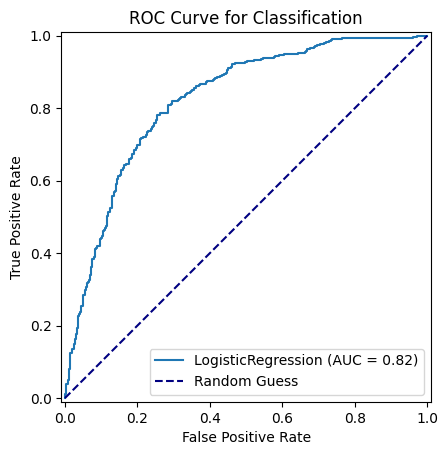

In [ ]:


# 2. Plot the ROC curve for the best-performing model in terms of accuracy.
RocCurveDisplay.from_estimator(model_reg, X_test_scaled, y_test)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Random Guess')
plt.title('ROC Curve for Classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()